### Track Classification Visualizer

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

# col_bd_fixed = 'F:\\DiffusionAnalysis\\Pr212dataSet\\AnalysisRebindCBCstart100noslow\\_ColBD_fixed-particles.csv'
# col_bd_spots = 'F:\\DiffusionAnalysis\\Pr212dataSet\\AnalysisRebindCBCstart100noslow\\_ColBD_spots.csv'

col_bd_fixed = 'F:\\DiffusionAnalysis\\test1\\_ColBD_fixed-particles.csv'
col_bd_spots = 'F:\\DiffusionAnalysis\\test1\\_ColBD_spots.csv'

box_size = 4
video_index = 0

In [2]:
fixed = np.loadtxt(col_bd_fixed, delimiter=',', dtype=float)
spots = np.loadtxt(col_bd_spots, delimiter=',', dtype=float)

def split_by_video(array):
    res = []
    stack = []
    record = array[0][0]
    for entry in array:
        if entry[0] == record:
            stack.append(entry[1:])
        else:
            res.append(stack.copy())
            stack = [entry[1:]]
            record = entry[0]
    res.append(stack.copy())
    return res

spots_video = split_by_video(spots)[video_index]
fixed_video = split_by_video(fixed)[video_index]

In [3]:
fixed_centers = np.array(fixed_video)[:, 2:4]
fixed_box_min = np.array(fixed_video)[:, 7:9]
fixed_box_max = np.array(fixed_video)[:, 9:11]
fixed_x = (fixed_box_min[:, 0] + fixed_box_max[:, 0]) / 2.0
fixed_y = (fixed_box_min[:, 1] + fixed_box_max[:, 1]) / 2.0
fixed_centers1 = np.c_[fixed_x, fixed_y]

def xslice(arr, slices):
    if isinstance(slices, tuple):
        return sum((arr[s] if isinstance(s, slice) else [arr[s]] for s in slices), [])
    elif isinstance(slices, slice):
        return arr[slices]
    else:
        return [arr[slices]]

def track_separation(spots):
    res = []
    stack = []
    record = xslice(list(spots[0]), np.s_[0:2, 6])
    for entry in spots:
        compare = xslice(list(entry), np.s_[0:2, 6])
        if(compare == record):
            stack.append(entry)
        else:
            res.append(stack.copy())
            stack = [entry]
            record = compare.copy()
    if(len(stack) > 0): res.append(stack)
    return res

spots_points = track_separation(spots_video)

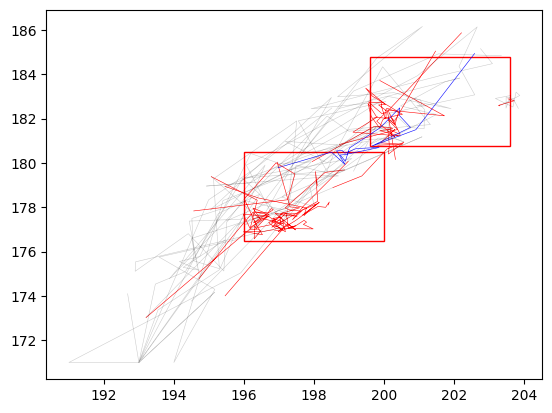

In [4]:
fig, ax = plt.subplots()
for entry in fixed_centers:
    x, y = entry
    x0, y0 = x - box_size / 2, y - box_size / 2
    width = box_size
    height = box_size
    if(x - box_size / 2 < 0):
        x0 = 0
        width = x + box_size / 2
    if(y - box_size / 2 < 0):
        y0 = 0
        height = y + box_size / 2
    rect = patches.Rectangle((x0, y0), width, height, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

colors = ['k', 'b', 'r']
alphas = [0.2, 1, 1]

for track in spots_points:
    array = np.array(track)
    x = array[:, 3]
    y = array[:, 4]
    tag = int(array[0, 6])
    if(tag > 1): tag = 1
    color = colors[tag + 1]
    alpha = alphas[tag + 1]
    plt.plot(x, y, color=color, linewidth=0.4, alpha = alpha)

# ax.set_xlim([125, 140])
# ax.set_ylim([82, 97])
plt.show()